# Data Engineering Event | Created by Jordan Larot

## Install libraries

In [ ]:
!pip install pandas lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercise 1: Data Engineering

## Data Extraction

In [ ]:
# Import pandas
import pandas as pd

# Specify url
url = 'https://www.worldometers.info/world-population/population-by-country/'

# Scrape website
tables = pd.read_html(url) ##### fill in blank

# Select the first element of tables
df = tables[0]

# Preview raw data
df.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


## Data Preparation

In [ ]:
# Rename columns
df = df.rename(columns={
    'Country (or dependency)': 'country', ##### fill in the blank
    'Population  (2020)': 'population',  ##### fill in the blank
    'Med.  Age': 'median_age'})

# Drop columns
df = df.drop(['#',
              'Yearly  Change',
              'Net  Change',
              'Density  (P/Km²)',
              'Land Area  (Km²)',
              'Migrants  (net)',
              'Fert.  Rate',
              'Urban  Pop %',
              'World  Share'
              ],
             axis=1)

# Remove countries with no median age
df = df[df['median_age'] != 'N.A.']

# Set index to the country
df = df.set_index('country',
                  drop=True)

# Preview
df.head()

,population,median_age
country,,
China,1439323776,38
India,1380004385,28
United States,331002651,38
Indonesia,273523615,30
Pakistan,220892340,23


## Data Visualization

<Axes: ylabel='country'>

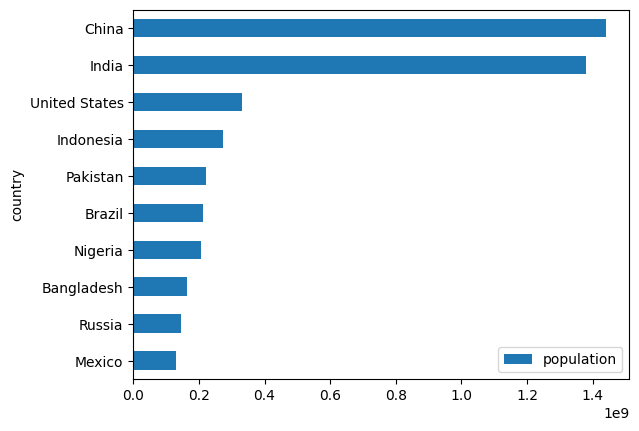

In [ ]:
##### DO NOT EDIT CODE BELOW

# Create dataframe with top 10 countries with the highest population
df_10 = df.copy().sort_values('population', ascending=False)[:10]

# Sort values by ascending
df_10 = df_10.sort_values('population', ascending=True)

# Create horizontal bar chart for the countries with the highest population
df_10.plot.barh(y='population')

##### DO NOT EDIT CODE ABOVE

### Q1 | From the bar chart above, which country has the highest population?

In [ ]:
# User response
user_answer = str(input('From the bar chart above, which country has the highest population?\n'))

if user_answer.lower() == (pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 1]).lower():
  print('\nCorrect!')
else:
  print('\nIncorrect!')

From the bar chart above, which country has the highest population?
China

Correct!


## Database


#### Database Creation

In [ ]:
# Import library
import sqlite3 ##### fill in the blank

# Specify database name
db_name = input("Name your database: ")

Name your database: my_first_db


In [ ]:
# Connect to a new database file (creates a new file if it doesn't exist)
conn = sqlite3.connect(f'{db_name}.db') ##### fill in blank

# Confirmation message for database creation
print(f"\nDatabase: {db_name} successfully created.")

# Close connection to the database
conn.close()


Database: my_first_db successfully created.


#### Creating Tables

In [ ]:
# Connect to the database file
conn = sqlite3.connect(f'{db_name}.db')

# Specify table name
table_name = input("Name your table: ")

Name your table: populations


In [ ]:
# Create a new table
conn.execute(f'''CREATE TABLE {table_name}
                 (id TEXT PRIMARY KEY NOT NULL,
                 population INT NOT NULL,
                 median_age INT NOT NULL);''')

# Confirmation message for table creation
print(f'\nTable: {table_name} successfully created.')

# Write the DataFrame to a new table in the database
df.to_sql(f'{table_name}',
          conn,
          if_exists='replace',
          index=True)

# Commit the changes to the database
conn.commit()  ##### fill in blank

# Close connection to the database
conn.close()


Table: populations successfully created.


# Exercise 2: SQL

## Populations

### How to query

In [ ]:
# Create function to print query
def print_query():

  # Query the data from the database and load it into a DataFrame
  output = pd.read_sql_query(SQL_STATEMENT,
                             conn)
  # Show SQL statement
  print(f'SQL Statement:{SQL_STATEMENT}')

  # Show output
  return output

#### Q2 | How many countries have a median age greater than 45 years?

In [ ]:
# Connect to the database
conn = sqlite3.connect(f'{db_name}.db')

##### EDIT CODE BELOW

# Create query statement
SQL_STATEMENT = """

SELECT *
FROM populations
WHERE median_age > 45;

"""

##### EDIT CODE ABOVE

# Print query
print_query()

SQL Statement:

SELECT *
FROM populations 
WHERE median_age > 45;




,country,population,median_age
0,Japan,126476461,48
1,Germany,83783942,46
2,Italy,60461826,47
3,Greece,10423054,46
4,Portugal,10196709,46
5,Martinique,375265,47


In [ ]:
# User response
user_answer = str(input('How many countries have a median age greater than 45 years?\n'))

if user_answer == str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 2]):
  print('\nCorrect!')
else:
  print('\nIncorrect!')

How many countries have a median age greater than 45 years?
6

Correct!


#### Q3 | What is the median age of the Congo?

In [ ]:
# Connect to the database
conn = sqlite3.connect(f'{db_name}.db')

##### EDIT CODE BELOW

# Create query statement
SQL_STATEMENT = """

SELECT median_age
FROM populations
WHERE country  == "Congo";

"""

##### EDIT CODE ABOVE

# Print query
print_query()

SQL Statement:

SELECT median_age
FROM populations
WHERE country  == "Congo";




,median_age
0,19


In [ ]:
# User response
user_answer = str(input('What is the median age of the Congo?\n'))

if user_answer == str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 3]):
  print('\nCorrect!')
else:
  print('\nIncorrect!')

What is the median age of the Congo?
19

Correct!


### How to join tables

In [ ]:
# Specify urls
gdp_url = 'https://www.worldometers.info/gdp/gdp-per-capita/'

# Scrape website
tables = pd.read_html(gdp_url)

# Select the first element of tables
gdp_df = tables[0]

# Subset gdp_df
gdp_df = gdp_df[['Country', 'GDP (PPP) per capita (2017)']]

# Rename columns
gdp_df = gdp_df.rename(columns={'Country': 'country',
                                'GDP (PPP) per capita (2017)': 'gdp_per_capita'})

# Set country as index
gdp_df = gdp_df.set_index('country')

# Preview raw data
gdp_df.head()

,gdp_per_capita
country,
Qatar,"$128,647"
Macao,"$115,367"
Luxembourg,"$107,641"
Singapore,"$94,105"
Brunei,"$79,003"


In [ ]:
# Create a connection to the database
conn = sqlite3.connect(f'{db_name}.db')

# Add dataframes as a table in the database
gdp_df.to_sql('gdp',
                 conn,
                 if_exists='replace',
                 index=True)

# Commit the changes to the database
conn.commit()

# Close connection to the database
conn.close()

### Columns in each table
populations:
*   country
*   population
*   median_age

gdp:
*   country
*   gdp_per_capita






#### Q4 | What is the GDP per capita for the United States?

In [ ]:
# Connect to the database
conn = sqlite3.connect(f'{db_name}.db')

##### EDIT CODE BELOW

# Create query statement
SQL_STATEMENT = """

SELECT gdp_per_capita
FROM populations
WHERE country == "United States";

"""

##### EDIT CODE ABOVE

# Print query
print_query()

DatabaseError: ignored

In [ ]:
# User response
user_answer = str(input('What is the GDP per capita for the United States? (do not put commas)\n'))

if user_answer == str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 4]):
  print('\nCorrect!')
else:
  print('\nIncorrect!')

## People

### Storing data to database

In [ ]:
# Specify urls
people_url = 'https://raw.githubusercontent.com/jordanlarot/de-event/main/people.csv'
demographics_url = 'https://raw.githubusercontent.com/jordanlarot/de-event/main/demographics.csv'

# Load files as dataframes
people_df = pd.read_csv(people_url, index_col=0)
demographics_df = pd.read_csv(demographics_url, index_col=0)

In [ ]:
# Create a connection to the database
conn = sqlite3.connect('people.db')

# Add dataframes as a table in the database
people_df.to_sql('people',
                 conn,
                 if_exists='replace',
                 index=True)

demographics_df.to_sql('demographics',
                       conn,
                       if_exists='replace',
                       index=True)

# Commit the changes to the database
conn.commit()

# Close connection to the database
conn.close()

### Columns in each table

people:
*   id
*   first_name
*   last_name
*   email
*   education
*   occupation
*   years_of_experience
*   monthly_salary

demographics:
*   id
*   gender
*   age

### Q5 | How many females are there?
*You need to use COUNT() and WHERE*

In [ ]:
# Connect to the database
conn = sqlite3.connect('people.db')

##### EDIT CODE BELOW

# Create query statement
SQL_STATEMENT = """



"""

##### EDIT CODE ABOVE

# Print query
print_query()

In [ ]:
# User response
user_answer = str(input('How many females are there?\n'))

if user_answer == str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 5]):
  print('\nCorrect!')
else:
  print('\nIncorrect!')

### Q6 | What is the highest monthly salary?
*You need to use MAX()*

In [ ]:
# Connect to the database
conn = sqlite3.connect('people.db')

##### EDIT CODE BELOW

# Create query statement
SQL_STATEMENT = """



"""

##### EDIT CODE ABOVE

# Print query
print_query()

In [ ]:
# User response
user_answer = str(input('What is the highest monthly salary?\n'))

if user_answer == str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 6]):
  print('\nCorrect!')
else:
  print('\nIncorrect!')

### Columns in each table

people:
*   id
*   first_name
*   last_name
*   email
*   education
*   occupation
*   years_of_experience
*   monthly_salary

demographics:
*   id
*   gender
*   age

### Q7 | What is the average years of experience for a person with a Master's degree?
*You  need to use GROUP BY and AVG()* <br>
*Example of GROUP BY:* <br>
*SELECT column_name_1, column_name_2* <br>
*FROM table* <br>
*GROUP BY column_name_1;*

In [ ]:
# Connect to the database
conn = sqlite3.connect('people.db')

##### EDIT CODE BELOW

# Create query statement
SQL_STATEMENT = """



"""

##### EDIT CODE ABOVE

# Print query
print_query()

In [ ]:
# User response
user_answer = str(input('What is the highest monthly salary?\n'))

if user_answer == str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 7]):
  print('\nCorrect!')
else:
  print('\nIncorrect!')

### Q8 | How old is Dr. Etu?
*You need to join the two tables* <br>
*look for last_name == 'Etu'*

In [ ]:
# Connect to the database
conn = sqlite3.connect('people.db')

##### EDIT CODE BELOW

# Create query statement
SQL_STATEMENT = """



"""

##### EDIT CODE ABOVE

# Print query
print_query()

In [ ]:
# Run code and enter your answer
user_answer = ""

while user_answer != str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 8]):
  user_answer = str(input("How old is Dr. Etu?\n"))

  if user_answer == str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 8]):
    print(f"\nYes! Dr. Etu is {str(pd.read_csv('https://raw.githubusercontent.com/jordanlarot/de-event/main/answers.csv').iloc[357, 8])}!")
    break
  else:
    print(f'\nNo! Dr. Etu is not {user_answer}!\n')